In [16]:
from pybaseball import statcast
from pybaseball import pitching_stats_bref
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loads in the Baseball Reference and Statcast data

In [17]:
bref_df = pitching_stats_bref("2023")
bref_df = bref_df[["Name", "ERA"]]

bref_df

,Name,ERA
1,Fernando Abad,4.26
2,Andrew Abbott,3.35
3,Cory Abbott,7.48
4,Albert Abreu,4.58
5,Bryan Abreu,2.07
...,...,...
844,Danny Young,1.08
845,Rob Zastryzny,5.21
846,Angel Zerpa,7.04
847,Bruce Zimmermann,5.56


In [18]:
savant_df = statcast(start_dt = "2023-03-30", end_dt = "2023-11-15")
#pd.set_option('display.max_columns', None)

savant_df

This is a large query, it may take a moment to complete


100%|██████████| 231/231 [00:54<00:00,  4.27it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
869,SL,2023-09-07,85.3,-3.33,5.52,"Wingenter, Trey",641343,622259,strikeout,swinging_strike,...,10,10,3,3,10,Strategic,Standard,39,0.0,-0.492
890,FF,2023-09-07,96.0,-3.15,5.6,"Wingenter, Trey",641343,622259,NaN,foul,...,10,10,3,3,10,Strategic,Standard,217,0.0,0.0
911,FF,2023-09-07,97.4,-3.11,5.63,"Wingenter, Trey",641343,622259,NaN,foul,...,10,10,3,3,10,Strategic,Standard,217,0.0,0.0
936,FF,2023-09-07,95.9,-3.05,5.57,"Wingenter, Trey",641343,622259,NaN,blocked_ball,...,10,10,3,3,10,Strategic,Standard,217,0.0,0.103
970,FF,2023-09-07,96.6,-3.13,5.63,"Wingenter, Trey",641343,622259,NaN,foul,...,10,10,3,3,10,Strategic,Standard,217,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Standard,234,0.0,-0.081
4077,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Strategic,229,0.0,-0.075
4211,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Strategic,233,0.0,0.134
4374,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Standard,237,0.0,0.063


In [19]:
# Converts the Induced Vertical Break and Horizontal Break to inches from feet
savant_df['IVB'] = savant_df['pfx_z'] * 12
savant_df['HB'] = savant_df['pfx_x'] * 12

savant_df = savant_df.rename(columns={'player_name': 'Name', 'pitch_type': 'Pitch Type'})
savant_df

,Pitch Type,game_date,release_speed,release_pos_x,release_pos_z,Name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB
869,SL,2023-09-07,85.3,-3.33,5.52,"Wingenter, Trey",641343,622259,strikeout,swinging_strike,...,3,3,10,Strategic,Standard,39,0.0,-0.492,-4.44,-0.48
890,FF,2023-09-07,96.0,-3.15,5.6,"Wingenter, Trey",641343,622259,NaN,foul,...,3,3,10,Strategic,Standard,217,0.0,0.0,13.68,-8.28
911,FF,2023-09-07,97.4,-3.11,5.63,"Wingenter, Trey",641343,622259,NaN,foul,...,3,3,10,Strategic,Standard,217,0.0,0.0,14.4,-5.88
936,FF,2023-09-07,95.9,-3.05,5.57,"Wingenter, Trey",641343,622259,NaN,blocked_ball,...,3,3,10,Strategic,Standard,217,0.0,0.103,17.16,-7.8
970,FF,2023-09-07,96.6,-3.13,5.63,"Wingenter, Trey",641343,622259,NaN,foul,...,3,3,10,Strategic,Standard,217,0.0,0.0,14.4,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Standard,234,0.0,-0.081,5.52,-20.28
4077,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Strategic,229,0.0,-0.075,13.92,-15.36
4211,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Strategic,233,0.0,0.134,14.28,-9.6
4374,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Standard,237,0.0,0.063,4.92,-20.52


In [20]:
def flip_names(name):
    first_name, last_name = name.split(", ")
    return f"{last_name} {first_name}"

savant_df['Name'] = savant_df["Name"].apply(flip_names)

### Groups by a pitchers' name and finds all the stats used to calculate sPRA

In [21]:
player_grouped = savant_df.groupby(['Name']).agg(
    Pitches = ('Pitch Type', 'count'),
    BB = ('events', lambda x: (x == 'walk').sum()),
    HBP = ('events', lambda x: (x == 'hit_by_pitch').sum()),
    K = ('events', lambda x: (x == 'strikeout').sum()),
    GB = ('bb_type', lambda x: (x == 'ground_ball').sum()),
    LD = ('bb_type', lambda x: (x == 'line_drive').sum()),
    FB = ('bb_type', lambda x: (x == 'fly_ball').sum()),
    PU = ('bb_type', lambda x: (x == 'popup').sum()),
    PA = ('events', lambda x: (x.isin(['other_out', 'single', 'double', 'triple', 'home_run', 'walk', 'strikeout', 'field_out', 'hit_by_pitch', 'sac_fly', 'sac_fly_double_play', 'sac_bunt', 'field_error', 'fielders_choice', 'double_play', 'fielders_choice_out', 'sac_fly_double_play', 'strikeout_double_play', 'catcher_interf', 'triple_play', 'grounded_into_double_play'])).sum()))

league_average = player_grouped[player_grouped['PA'] >= 5]
player_grouped = player_grouped[player_grouped['PA'] >= 350]
player_grouped

,Pitches,BB,HBP,K,GB,LD,FB,PU,PA
Name,,,,,,,,,
Aaron Civale,1727,27,3,95,126,74,85,26,429
Aaron Nola,2722,44,1,175,197,118,131,33,690
Adam Wainwright,1598,35,1,49,137,97,104,10,420
Adrian Houser,1538,28,1,76,138,65,75,14,390
Alek Manoah,1689,56,9,79,104,65,78,21,405
...,...,...,...,...,...,...,...,...,...
Yusei Kikuchi,2410,42,4,152,159,105,105,35,593
Zac Gallen,2763,38,3,183,202,135,135,20,708
Zach Eflin,2247,20,3,157,221,86,92,34,603


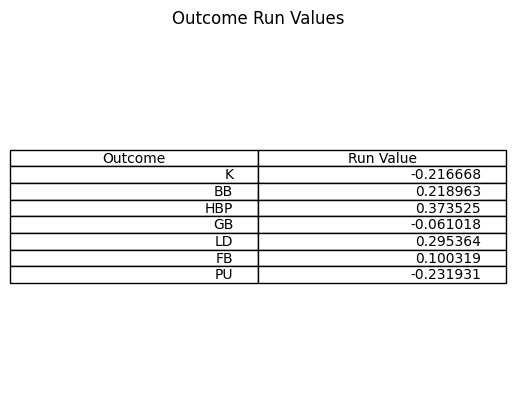

In [22]:
K = -0.216668
BB = 0.218963
HBP = 0.373525
GB = -0.061018
LD = 0.295364
FB = 0.100319
PU = -0.231931

outcomes = ["K", "BB", "HBP", "GB", "LD", "FB", "PU"]
run_values = [K, BB, HBP, GB, LD, FB, PU]

RunValues = pd.DataFrame({'Outcome': outcomes, 'Run Value': run_values})
RunValues

fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= RunValues.values, colLabels= RunValues.columns, loc='center')

ax.set_title("Outcome Run Values")

plt.savefig("Outcomes.png")
plt.show()

In [23]:
player_grouped["sPRA"] = round(
    ((0.85 * (BB * 16.38860664066341 * player_grouped["BB"]) + (HBP * 16.38860664066341 * player_grouped["HBP"]) + (K * 16.38860664066341 * player_grouped["K"]) + 
    (FB * 16.38860664066341 * player_grouped["FB"]) + (LD * 16.38860664066341 * player_grouped["LD"]) + (PU * 16.38860664066341 * player_grouped["PU"]) + (GB * 16.38860664066341 * player_grouped["GB"]))
    / player_grouped["PA"]) + 4.05, 2)
player_grouped = player_grouped.sort_values(by = "sPRA")
player_grouped = player_grouped.reset_index()
player_grouped

,Name,Pitches,BB,HBP,K,GB,LD,FB,PU,PA,sPRA
0,Tyler Glasnow,1553,28,1,134,121,52,55,9,397,3.55
1,Spencer Strider,2697,51,8,250,124,84,117,26,648,3.58
2,Zach Eflin,2247,20,3,157,221,86,92,34,603,3.62
3,Freddy Peralta,2588,54,6,191,153,73,104,38,608,3.64
4,Jesús Luzardo,2610,44,5,180,172,85,115,39,633,3.74
...,...,...,...,...,...,...,...,...,...,...,...
127,Miles Mikolas,2721,35,8,113,221,159,159,34,716,4.66
128,Carlos Carrasco,1587,38,6,66,140,87,66,14,406,4.68
129,Connor Seabold,1467,26,7,62,93,77,97,22,382,4.72
130,Noah Syndergaard,1408,19,10,56,117,86,85,18,386,4.80


In [24]:
league_average["sPRA"] = round(
    ((0.85 * (BB * 16.38860664066341 * league_average["BB"]) + (HBP * 16.38860664066341 * league_average["HBP"]) + (K * 16.38860664066341 * league_average["K"]) + 
    (FB * 16.38860664066341 * league_average["FB"]) + (LD * 16.38860664066341 * league_average["LD"]) + (PU * 16.38860664066341 * league_average["PU"]) + (GB * 16.38860664066341 * league_average["GB"]))
    / league_average["PA"]) + 4.05, 2)

### Merges the BRef and Statcast tables together to have sPRA and ERA on the same table and show the top 15 in sPRA

In [25]:
Merged = pd.merge(bref_df, player_grouped, on='Name', how='left')
Merged.loc[:, "sPRA - ERA"] = round(Merged["sPRA"] - Merged["ERA"], 2)
Merged.loc[:, "sPRA+"] =  round((np.mean(league_average["sPRA"]) / Merged["sPRA"]) * 100, 2)
top15 = Merged.sort_values(by = "sPRA", ascending = True)
top15 = top15[["Name", "sPRA", "ERA", "sPRA - ERA", "sPRA+"]].head(15)
top15

,Name,sPRA,ERA,sPRA - ERA,sPRA+
257,Tyler Glasnow,3.55,3.12,0.43,121.80
695,Spencer Strider,3.58,3.56,0.02,120.78
196,Zach Eflin,3.62,3.40,0.22,119.45
556,Freddy Peralta,3.64,3.95,-0.31,118.79
531,Shohei Ohtani,3.74,3.14,0.60,115.61
247,Kevin Gausman,3.79,3.30,0.49,114.09
651,Kodai Senga,3.79,3.17,0.62,114.09
769,Logan Webb,3.79,3.49,0.30,114.09
777,Zack Wheeler,3.82,3.59,0.23,113.19
369,Clayton Kershaw,3.82,2.48,1.34,113.19


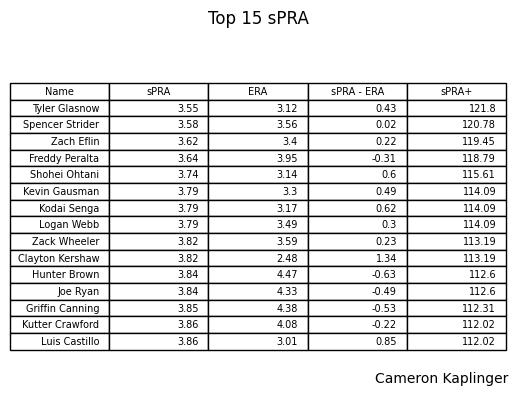

In [26]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= top15.values, colLabels= top15.columns, loc='center')

ax.set_title("Top 15 sPRA")

caption = "Cameron Kaplinger"
fig.text(0.8, 0.15, caption, ha='center', fontsize=10)

plt.savefig("Top15.png")
plt.show()

### Displays the bottom 15 in sPRA

In [27]:
bottom15 = Merged.sort_values(by = "sPRA", ascending = False)
bottom15 = bottom15[["Name", "sPRA", "ERA", "sPRA - ERA", "sPRA+"]].head(15)
bottom15

,Name,sPRA,ERA,sPRA - ERA,sPRA+
754,Adam Wainwright,5.01,8.10,-3.09,86.31
708,Noah Syndergaard,4.80,6.50,-1.70,90.08
648,Connor Seabold,4.72,7.65,-2.93,91.61
112,Carlos Carrasco,4.68,6.80,-2.12,92.39
483,Miles Mikolas,4.66,4.66,0.00,92.79
226,Kyle Freeland,4.63,5.18,-0.55,93.39
25,Tyler Anderson,4.62,5.58,-0.96,93.59
128,Yonny Chirinos,4.61,5.40,-0.79,93.80
478,Tylor Megill,4.57,5.29,-0.72,94.62
767,Luke Weaver,4.56,6.77,-2.21,94.82


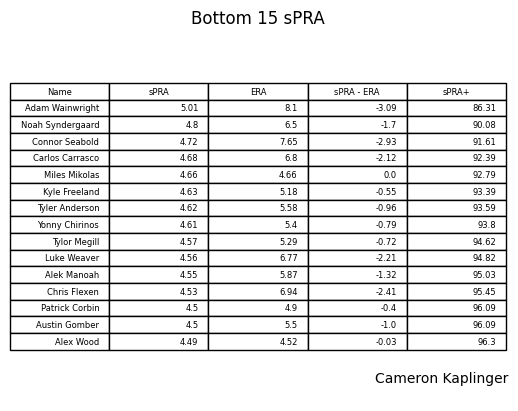

In [28]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= bottom15.values, colLabels= bottom15.columns, loc='center')

ax.set_title("Bottom 15 sPRA")

caption = "Cameron Kaplinger"
fig.text(0.8, 0.15, caption, ha='center', fontsize=10)

plt.savefig("Bottom15.png")
plt.show()